In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris()

In [4]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
import seaborn as sns

In [6]:
df = sns.load_dataset('iris')

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
#Independant And dependent variables
x = df.iloc[:,:-1]
y = dataset.target

In [9]:
x,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [10]:
## Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.33,random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
##Post Pruning
tree_classifier = DecisionTreeClassifier()

In [13]:
tree_classifier.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'x[3] <= 1.55\ngini = 0.655\nsamples = 49\nvalue = [12, 18, 19]'),
 Text(0.4, 0.5, 'x[2] <= 2.5\ngini = 0.48\nsamples = 30\nvalue = [12, 18, 0]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 18\nvalue = [0, 18, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 19]'),
 Text(0.7, 0.6666666666666667, '  False')]

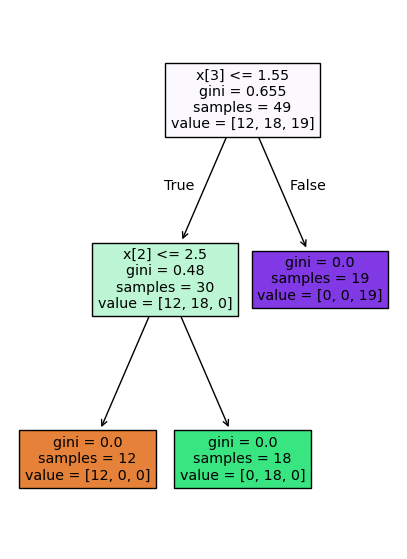

In [16]:
from sklearn import tree
plt.figure(figsize=(5,7))
tree.plot_tree(tree_classifier,filled=True)

In [17]:
##post pruning with max depth 2

In [18]:
tree_classifier = DecisionTreeClassifier(max_depth=2)
tree_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.6, 0.8333333333333334, 'x[3] <= 1.55\ngini = 0.655\nsamples = 49\nvalue = [12, 18, 19]'),
 Text(0.4, 0.5, 'x[2] <= 2.5\ngini = 0.48\nsamples = 30\nvalue = [12, 18, 0]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 18\nvalue = [0, 18, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 19]'),
 Text(0.7, 0.6666666666666667, '  False')]

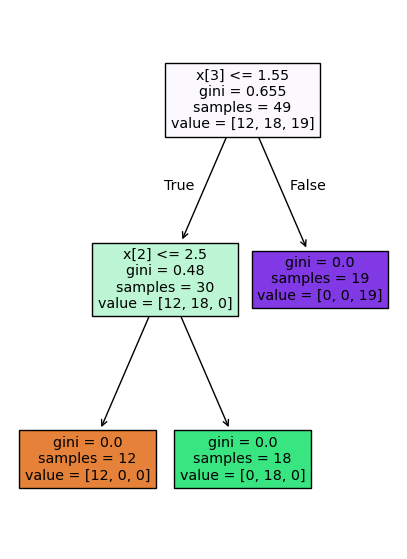

In [19]:
from sklearn import tree
plt.figure(figsize=(5,7))
tree.plot_tree(tree_classifier,filled=True)

In [20]:
##Prediction
ypred = tree_classifier.predict(x_test)

In [21]:
ypred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0,
       0, 2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 2, 0])

In [22]:
from sklearn.metrics import accuracy_score,classification_report

In [23]:
score = accuracy_score(ypred,y_test)
print(score)

0.9207920792079208


In [24]:
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.84      0.90      0.87        30
           2       0.90      0.85      0.88        33

    accuracy                           0.92       101
   macro avg       0.92      0.92      0.92       101
weighted avg       0.92      0.92      0.92       101

